In [1]:
#Machine Learning - ZS - Stroke Rate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [3]:
df = pd.read_csv('heart.csv')

# Explorativna analyza

In [4]:
#zobrazenie prvych piatich zaznamov "overenie dat"
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#zobrazenie poslednych piatich zaznamov "overenie dat"
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
#zobrazenie vsetkych dat, vieme zistit ci su nejake hodnoty chybajuce
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#zistenie poctu nulovych hodnot
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Age                AxesSubplot(0.125,0.657941;0.227941x0.222059)
RestingBP       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Cholesterol     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
FastingBS          AxesSubplot(0.125,0.391471;0.227941x0.222059)
MaxHR           AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Oldpeak         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
HeartDisease          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

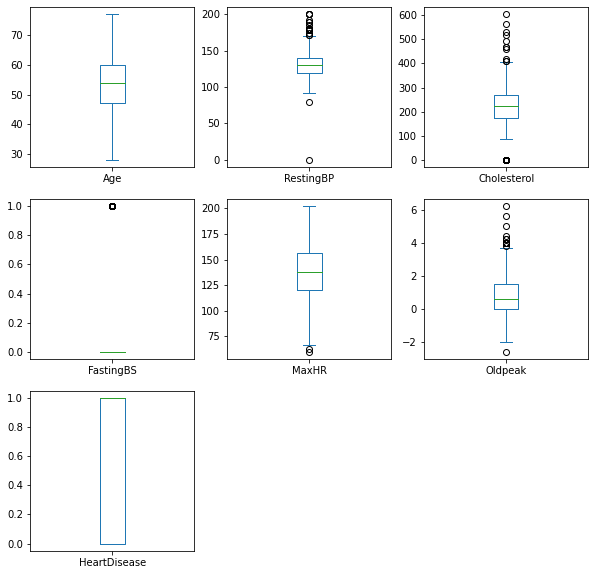

In [8]:
#graficke zobrazenie hodnot v stlpci bmi budeme vymazavat outlayer
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(10,10))

Age                AxesSubplot(0.125,0.657941;0.227941x0.222059)
RestingBP       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Cholesterol     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
FastingBS          AxesSubplot(0.125,0.391471;0.227941x0.222059)
MaxHR           AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Oldpeak         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
HeartDisease          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

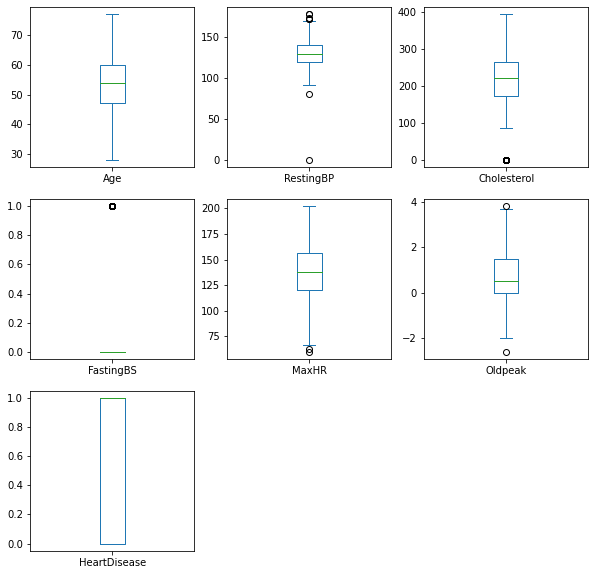

In [9]:
#vymazanie outlierov
df_wo_out = df[(df.RestingBP < df.RestingBP.quantile(.985))&(df.Cholesterol < df.Cholesterol.quantile(.985))&(df.Oldpeak < df.Oldpeak.quantile(.985))]

df_wo_out.plot(kind="box",subplots=True,layout=(3,3),figsize=(10,10))

In [10]:
#zistime si ktore premenne su slovne a ktore su ciselne
ciselne_premenne=list(df_wo_out.dtypes[df_wo_out.dtypes!="object"].index.values)
slovne_premenne=list(df_wo_out.dtypes[df_wo_out.dtypes=="object"].index.values)

In [11]:
ciselne_premenne

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [12]:
slovne_premenne

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [13]:
#naplnime si premenne predstavujuce polia udajmi, ktore prisluchaju jednotlivym riadkom pri danych premennych
#inak povedane priradi hodnoty a skopiruje cele stlpce pre dane premenne
df_ciselne_premenne = df.loc[:,ciselne_premenne]
df_slovne_premenne = df.loc[:,slovne_premenne]

In [14]:
#vypiseme si ciselne premenne a ich hodnoty
df_ciselne_premenne

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [15]:
#vypiseme si slovne premenne a ich hodnoty
df_slovne_premenne

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [16]:
#ExerciseAngina sice nie je naša závislá(cieľová) premenná ale aby sme ju mohli zapojit do porovnavani a vyjadrovat vztahy k
#zavislej premennej, tak ju prekodujeme na ciselnu premennu
df["ExerciseAngina"]=df["ExerciseAngina"].astype("category")
df_ciselne_premenne["ExerciseAngina_num"]=df["ExerciseAngina"].cat.codes

In [17]:
#vypiseme si ciselne premenne a ich hodnoty aj s prekodovanou premennou
df_ciselne_premenne

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ExerciseAngina_num
0,40,140,289,0,172,0.0,0,0
1,49,160,180,0,156,1.0,1,0
2,37,130,283,0,98,0.0,0,0
3,48,138,214,0,108,1.5,1,1
4,54,150,195,0,122,0.0,0,0
...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0
914,68,144,193,1,141,3.4,1,0
915,57,130,131,0,115,1.2,1,1
916,57,130,236,0,174,0.0,1,0


In [18]:
#ideme urcovat vztahy medzi zavislou premennou a nezavislimi premennymi 
#budeme to robit pomocou korelacie - vzajomny vztah medyi dvomi alebo viacerymi premennymi

#nasa cielova hodnota (zavisla premenna je 'HeartDisease' - cize ci pacient ma alebo nema ochorenie srdca)
#v nasom pripade je cielova hodnota ciselna, cize ju nemusime upravovat
corr=df_ciselne_premenne.corr()

In [19]:
corr["HeartDisease"].sort_values(ascending=False)

HeartDisease          1.000000
ExerciseAngina_num    0.494282
Oldpeak               0.403951
Age                   0.282039
FastingBS             0.267291
RestingBP             0.107589
Cholesterol          -0.232741
MaxHR                -0.400421
Name: HeartDisease, dtype: float64

<AxesSubplot:>

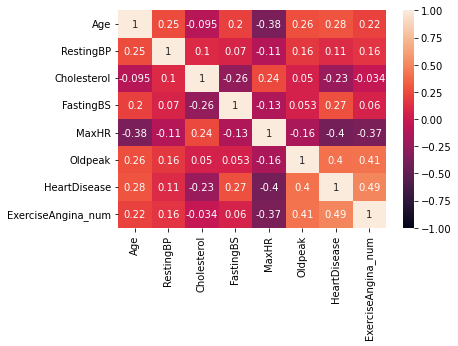

In [20]:
#vysledky korelacie nam hovoria,
#ze najvacsie vztahy su medzi ochorenim srdca k ExerciseAngina, oldpeak a age.
#To znamena, ze ludia ktory pocituju nejake problemy a pichania hrudnika pri sporte maju ochorenie srdca
#Taktiez ale aj oldpeak, co znamena nepravidelnost pri ekg merani, znamena vo velkom mnozstve ochorenie srdca
#prakticky ziadnu rolu nehraju pri ochoreni srdca cholesterol a MaxHR

#pomocou heat mapy (tepelnej mapy) si vieme zobrazit vsetky vztahy medzi premennymi
sns.heatmap(corr,vmin=-1,vmax=1,annot=True )

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

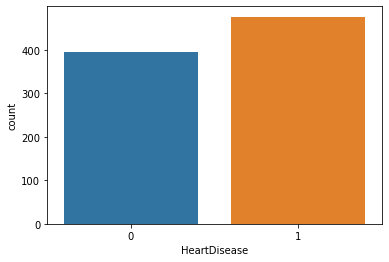

In [21]:
#mozeme si zobrazit pomer pacientov s mŕtvicou a bez mŕtvice
sns.countplot(x = "HeartDisease",data=df_wo_out)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

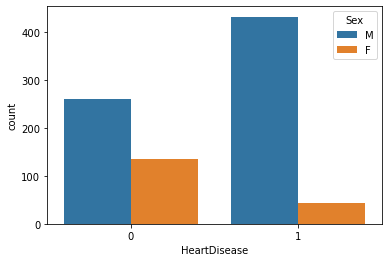

In [22]:
#pomer infarktov medzi pohlaviami
sns.countplot(x = "HeartDisease",data=df_wo_out,hue="Sex")

<AxesSubplot:xlabel='RestingBP', ylabel='MaxHR'>

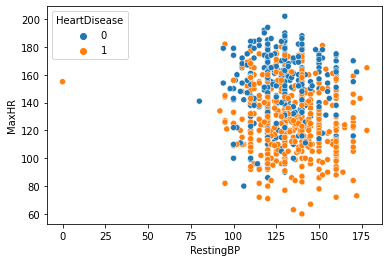

In [23]:
sns.scatterplot(data=df_wo_out, x="RestingBP",y="MaxHR", hue="HeartDisease")

In [24]:
df_wo_out.loc[(df_wo_out['Age'] > 20) & (df_wo_out['Age'] <= 40), 'Age'] = 1
df_wo_out.loc[(df_wo_out['Age'] > 40) & (df_wo_out['Age'] <= 60), 'Age'] = 2
df_wo_out.loc[df_wo_out['Age']  > 60,'Age'] = 3

df_wo_out

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,2,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,2,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,2,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,3,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,2,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,2,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

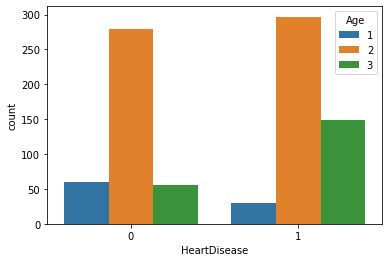

In [25]:
sns.countplot(x = "HeartDisease",data=df_wo_out,hue="Age")

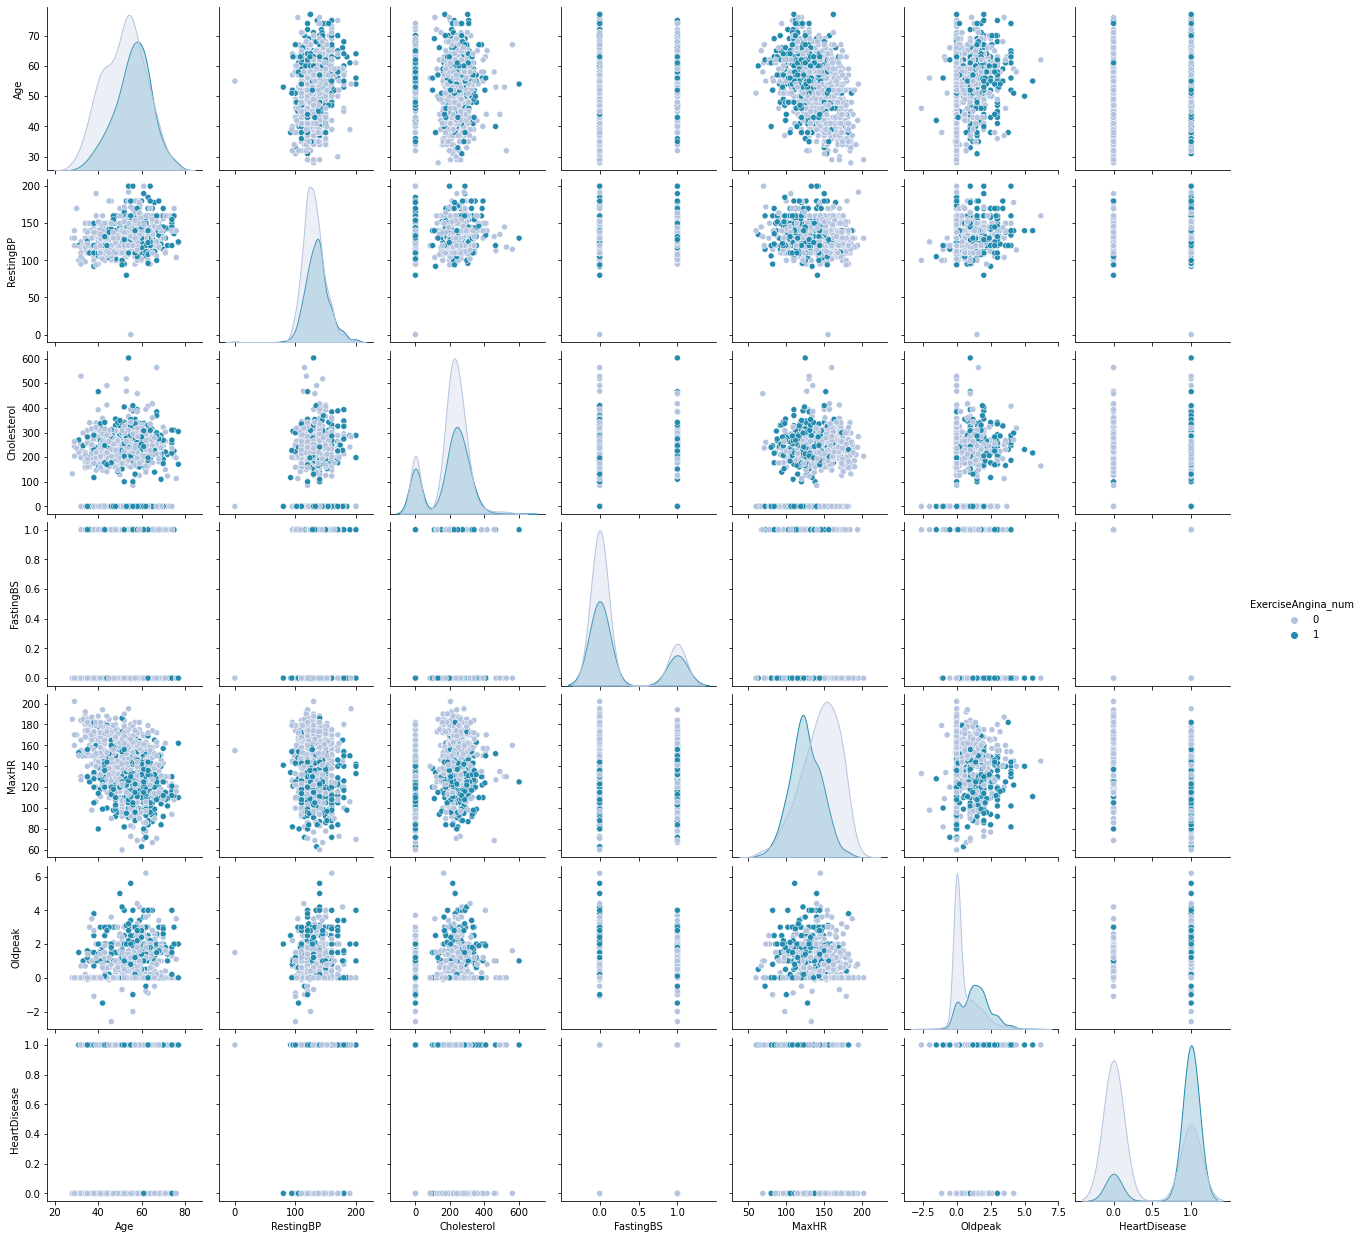

In [53]:
sns.pairplot(df_ciselne_premenne, hue='ExerciseAngina_num', palette="PuBuGn")

# Vytvorenie trenovacej a testovacej casti

In [28]:
#zadefinovanie premennych
#do X idu stlpce, ktore urcuju stav pacienta
#do y ide len jeden stlpec a to ci pacient mal alebo nemal infarkt
X=df_ciselne_premenne[["Age","Cholesterol","FastingBS","MaxHR","Oldpeak","ExerciseAngina_num"]]
y=df_ciselne_premenne["HeartDisease"]


In [29]:
#pouzivame funkciu na vytvorenie testovacej a trenovacej casti
#test_size sme nespecifikovali co znamena, ze je defaultne nastavena na 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
#vidime, ze funkcia vlozila 25 percent hodnot z datasetu do testovacej casti
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(688, 6) (688,)
(230, 6) (230,)


In [31]:
#zobrazenie trenovacej casti
X_train

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_num
470,53,0,0,106,0.0,0
106,48,254,0,110,0.0,0
780,64,325,0,154,0.0,1
304,51,0,1,126,2.2,0
589,74,237,1,94,0.0,0
...,...,...,...,...,...,...
674,62,281,0,103,1.4,0
685,61,260,0,140,3.6,1
132,56,388,0,122,2.0,1
180,52,225,0,120,2.0,1


In [32]:
#zobrazenie testovacej casti
X_test

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,ExerciseAngina_num
497,61,241,0,148,3.0,1
747,42,226,0,178,0.0,0
727,60,305,0,161,0.0,0
295,61,0,1,110,1.5,1
600,57,207,0,96,1.0,1
...,...,...,...,...,...,...
204,56,184,0,100,0.0,0
335,62,0,1,134,-0.8,0
701,62,208,1,140,0.0,0
597,55,185,0,136,0.2,0


# Vypocet ML metod

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [45]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes","Random Forest"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=45), naive_bayes.GaussianNB(), RandomForestClassifier()]
result = []
for clff in clfs:
    clff.fit(X_train,y_train)
    y_pred = clff.predict(X_test) #odhadneme cieľovú triedu pre prvky testovacej množiny
    acc = accuracy_score(y_test, y_pred)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy
Logistic Regression,0.813043
Support Vector Machine,0.804348
Naive Bayes,0.804348
Random Forest,0.778261
Decision Tree,0.708696
K Nearest Neighbor,0.673913


In [46]:
knn = KNeighborsClassifier(3) #vytvoríme knn klasifikátor
knn.fit(X_train, y_train) #trenovaci model
y_pred = knn.predict(X_test) #odhadovane cielove hodnoty
acc = accuracy_score(y_test, y_pred) #vypocet presnosti

#y_pred obsahuje 1228 odhadovanych hodnot 
#vypocet presnosti prebieha na zaklade predikcie z X test. hodnot (y_pred),
#ktore sa porovnavaju s y test hodnotami

acc #vypis presnosti

0.6521739130434783

In [47]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pr = clf.predict(X_test)
print(y_pr)

[0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1
 1 0 0 1 1 0 0 0]


In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pr))

Accuracy: 0.7


In [50]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7782608695652173
